# Handwritten digits classification using CNN

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train[0].shape

(28, 28)

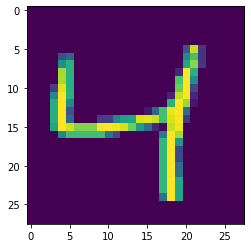

In [10]:
plt.imshow(X_train[2])

In [11]:
y_train[2]

4

In [12]:
# Normalizing the values
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 16ms/step - loss: 0.1432 - accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0471 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0183 - accuracy: 0.9942


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0303 - accuracy: 0.9907


[0.030349383130669594, 0.9907000064849854]

In [20]:
y_predicted = cnn.predict(X_test)
y_predicted[0]

313/313 [==============================] - 2s 5ms/step


array([2.4421118e-07, 2.5638113e-07, 6.1133960e-08, 3.6878166e-07,
       2.0482729e-09, 1.3256585e-10, 9.0781662e-15, 9.9999678e-01,
       8.7275831e-09, 2.2257609e-06], dtype=float32)

In [21]:
np.argmax(y_predicted[0])

7

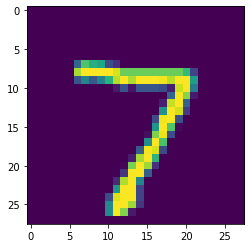

In [22]:
plt.imshow(X_test[0])

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    0,    0,    1,    0,    2,    3,    0],
       [   0, 1131,    2,    0,    0,    1,    1,    0,    0,    0],
       [   0,    1, 1026,    0,    0,    0,    0,    2,    3,    0],
       [   0,    0,    3, 1003,    0,    1,    0,    1,    2,    0],
       [   0,    0,    0,    0,  970,    0,    3,    0,    2,    7],
       [   1,    0,    0,    8,    0,  880,    1,    0,    1,    1],
       [   1,    2,    0,    0,    1,    2,  951,    0,    1,    0],
       [   0,    7,    2,    2,    0,    1,    0, 1013,    1,    2],
       [   2,    0,    1,    0,    0,    1,    0,    0,  969,    1],
       [   1,    3,    0,    1,    2,    5,    1,    1,    4,  991]])>

Text(69.0, 0.5, 'Truth')

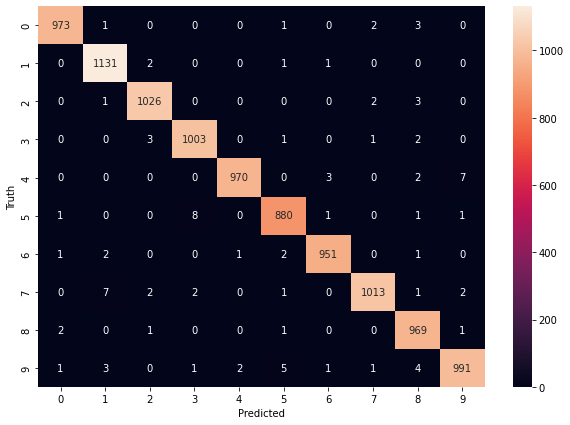

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')